<a href="https://colab.research.google.com/github/rajbeniwal710/Classification_Models/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [2]:
pharma_data = pharma_data.dropna()

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()
pharma_data['Treated_with_drugs'] = le.fit_transform(pharma_data['Treated_with_drugs'])

In [5]:
#x-y 
x = pharma_data.iloc[:,:-1]
x = x.drop(['Patient_ID'], axis = 1)
y = pharma_data.iloc[:,-1]
#data cleaning
x = pd.get_dummies(x)

In [6]:
x.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,22374,8,31,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,1,0,1,1
1,18164,5,16,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,1
2,6283,23,31,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,1,0,1
3,5339,51,0,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,1,1
5,10808,45,31,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,1


In [7]:
#lets drop some columns to drop dummy trap
x = x.drop(['Patient_Smoker_NO'], axis = 1)
x = x.drop(['Patient_Rural_Urban_URBAN'], axis = 1)
x = x.drop(['ID_Patient_Care_Situation'], axis = 1)

In [8]:
x = x.drop(['Patient_mental_condition_Stable'], axis = 1)

In [9]:
x.loc[x['Patient_Age']>100, 'Patient_Age'] = 100

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x['Treated_with_drugs'] = mms.fit_transform(np.array(x['Treated_with_drugs']).reshape(-1,1))
x['Diagnosed_Condition'] = mms.fit_transform(np.array(x['Diagnosed_Condition']).reshape(-1,1))
x['Patient_Age'] = mms.fit_transform(np.array(x['Patient_Age']).reshape(-1,1))
x['Patient_Body_Mass_Index'] = mms.fit_transform(np.array(x['Patient_Body_Mass_Index']).reshape(-1,1))

In [11]:
y = y.astype('category')

In [12]:
#train-validation split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [14]:
model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the results
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [15]:
print(scores.mean())

0.8105837899517796


In [16]:
model = RandomForestClassifier().fit(X_train, y_train)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix 

In [18]:
y_pred = model.predict(X_train)
print("Classification report for train dataset - \n", classification_report(y_train,y_pred))

Classification report for train dataset - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5480
           1       1.00      1.00      1.00      9158

    accuracy                           1.00     14638
   macro avg       1.00      1.00      1.00     14638
weighted avg       1.00      1.00      1.00     14638



In [19]:
# Predicting the values of test data
y_pred = model.predict(X_test)
print("Classification report for test dataset - \n", classification_report(y_test,y_pred))

Classification report for test dataset - 
               precision    recall  f1-score   support

           0       0.76      0.73      0.75      2727
           1       0.84      0.86      0.85      4484

    accuracy                           0.81      7211
   macro avg       0.80      0.80      0.80      7211
weighted avg       0.81      0.81      0.81      7211



In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy Score: 0.8119539592289557')

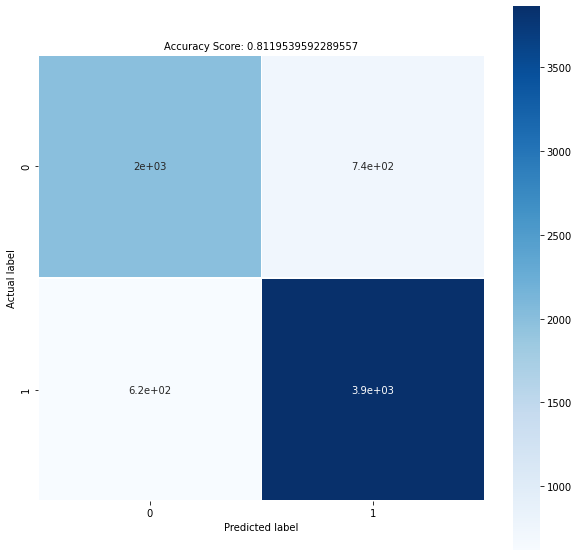

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(data=cm,linewidths=.8, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 10)

In [22]:
x.shape

(21849, 14)

In [23]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [8,10,12,14]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:   59.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [24]:
y_pred = grid_search.best_estimator_.predict(X_train)
print("Classification report for train dataset - \n", classification_report(y_train,y_pred))

Classification report for train dataset - 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      5480
           1       0.89      0.92      0.90      9158

    accuracy                           0.88     14638
   macro avg       0.87      0.86      0.87     14638
weighted avg       0.88      0.88      0.88     14638



In [26]:
y_pred = grid_search.best_estimator_.predict(X_test)
print("Classification report for train dataset - \n", classification_report(y_test,y_pred))

Classification report for train dataset - 
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      2727
           1       0.83      0.87      0.85      4484

    accuracy                           0.81      7211
   macro avg       0.80      0.79      0.79      7211
weighted avg       0.81      0.81      0.81      7211



Text(0.5, 1.0, 'Accuracy Score: 0.8119539592289557')

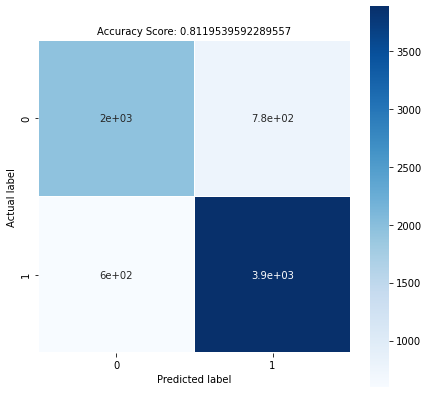

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.8, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 10)